Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000k

In [1]:
import numpy as np
import requests
import pandas as pd
import numpy as np
from datetime import datetime

# Function to download data from the given URL
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to convert the data into properly structured format
def convert_data(data):
    structured_data = []
    for meteorite in data:
        entry = {
            'name': meteorite['name'],
            'id': meteorite['id'],
            'nametype': meteorite['nametype'],
            'recclass': meteorite['recclass'],
            'mass': float(meteorite.get('mass', np.nan)),  # Assign NaN if key not found
            'year': convert_year(meteorite.get('year', '')),  # Convert year to datetime format
            'reclat': float(meteorite.get('reclat', np.nan)),  # Assign NaN if key not found
            'reclong': float(meteorite.get('reclong', np.nan)),  # Assign NaN if key not found
            'coordinates': [float(meteorite.get('reclat', np.nan)), float(meteorite.get('reclong', np.nan))]  # Assign NaN if keys not found
        }
       
        structured_data.append(entry)
        
    return structured_data

def convert_year(date_string): 
    try:
        date_obj = datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%f')
        year = date_obj.year
        return year
    except (TypeError, ValueError):
        return np.nan 

# Function to save data in CSV format
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

# Main program
if __name__ == '__main__':
    url = 'https://data.nasa.gov/resource/y77d-th95.json'
    filename = 'meteorite_data.csv'

    # Download data
    data = download_data(url)

    # Convert data
    structured_data = convert_data(data)

    # Save data to CSV
    save_to_csv(structured_data, filename)



df4=pd.read_csv('meteorite_data.csv')
df4.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880.0,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,Valid,H6,720.0,1951.0,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,Valid,EH4,107000.0,1952.0,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976.0,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,Valid,L6,780.0,1902.0,-33.16667,-64.95000,"[-33.16667, -64.95]"


Get all the Earth meteorites that fell before the year 2000

In [2]:
meteorites_before_2000 = df4[df4['year'] < 2000]

# Print the Earth meteorites that fell before the year 2000
print("Earth meteorites that fell before the year 2000:")
print(meteorites_before_2000['name'].unique())

Earth meteorites that fell before the year 2000:
['Aachen' 'Aarhus' 'Abee' 'Acapulco' 'Achiras' 'Adhi Kot'
 'Adzhi-Bogdo (stone)' 'Agen' 'Aguada' 'Aguila Blanca' 'Aioun el Atrouss'
 'Aïr' 'Aire-sur-la-Lys' 'Akaba' 'Akbarpur' 'Akwanga' 'Akyumak' 'Al Rais'
 'Alais' 'Albareto' 'Alberta' 'Aldsworth' 'Aleppo' 'Alessandria'
 'Alexandrovsky' 'Alfianello' 'Allegan' 'Allende' "Alta'ameem"
 'Ambapur Nagla' 'Andhara' 'Andover' 'Andreevka' 'Andura' 'Angers'
 'Angra dos Reis (stone)' 'Ankober' 'Anlong' 'Aomori' 'Appley Bridge'
 'Apt' 'Arbol Solo' 'Archie' 'Arroyo Aguiar' 'Asco' 'Ashdon' 'Assisi'
 'Atarra' 'Atemajac' 'Athens' 'Atoka' 'Aubres' 'Aumale' 'Aumieres'
 'Ausson' 'Avanhandava' 'Avce' 'Avilez' 'Awere' 'Aztec' 'Bachmut' 'Bahjoi'
 'Bald Mountain' 'Baldwyn' 'Bali' 'Ban Rong Du' 'Bandong' 'Bansur'
 'Banswal' 'Banten' 'Barbotan' 'Barcelona (stone)' 'Barea' 'Barnaul'
 'Barntrup' 'Baroti' 'Barwell' 'Baszkówka' 'Bath' 'Bath Furnace' 'Bawku'
 'Baxter' 'Beardsley' 'Beaver Creek' 'Beddgelert' 'Bells' '

Get all the earth meteorites co-ordinates who fell before the year 1970

In [3]:
meteorites_before_1970 = df4[df4['year'] < 1970]

# Print the Earth meteorites that fell before the year 2000
print(" earth meteorites co-ordinates who fell before the year 1970:")
print(meteorites_before_1970['coordinates'].unique())

 earth meteorites co-ordinates who fell before the year 1970:
['[50.775, 6.08333]' '[56.18333, 10.23333]' '[54.21667, -113.0]'
 '[-33.16667, -64.95]' '[32.1, 71.8]' '[44.83333, 95.16667]'
 '[44.21667, 0.61667]' '[-31.6, -65.23333]' '[-30.86667, -64.55]'
 '[19.08333, 8.38333]' '[50.66667, 2.33333]' '[29.51667, 35.05]'
 '[29.71667, 77.95]' '[8.91667, 8.43333]' '[24.41667, 39.51667]'
 '[44.11667, 4.08333]' '[44.65, 11.01667]' '[2.0, 22.66667]'
 '[51.78333, -1.78333]' '[36.23333, 37.13333]' '[44.88333, 8.75]'
 '[50.95, 31.81667]' '[45.26667, 10.15]' '[42.53333, -85.88333]'
 '[26.96667, -105.31667]' '[27.66667, 78.25]' '[26.58333, 85.56667]'
 '[44.61667, -70.75]' '[48.7, 37.5]' '[20.88333, 76.86667]'
 '[47.46667, -0.55]' '[-22.96667, -44.31667]' '[9.53333, 39.71667]'
 '[53.58333, -2.71667]' '[43.86667, 5.38333]' '[-33.0, -66.0]'
 '[38.5, -94.3]' '[-31.41667, -60.66667]' '[42.45, 9.03333]'
 '[52.05, 0.3]' '[43.03333, 12.55]' '[25.25417, 80.625]'
 '[20.06667, -103.66667]' '[34.75, -87.0]' '[3

Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [4]:
meteorites_mass_more_than_10000kg = df4[df4['mass'] > 10000]

# Print the Earth meteorites that fell before the year 2000
print(" earth meteorites whose mass was more than 10000kg:")
print(meteorites_mass_more_than_10000kg['name'].unique())

 earth meteorites whose mass was more than 10000kg:
['Abee' 'Agen' 'Aïr' 'Akyumak' 'Alfianello' 'Allegan' 'Allende' 'Andura'
 'Appley Bridge' 'Aumale' 'Ausson' 'Bachmut' 'Bahjoi' 'Ban Rong Du'
 'Bandong' 'Bansur' 'Barwell' 'Bassikounou' 'Baszkówka' 'Bath'
 'Bath Furnace' 'Beardsley' 'Beaver Creek' 'Benguerir' "Beni M'hira"
 'Bensour' 'Béréba' 'Bilanga' 'Bjurböle' 'Boguslavka' 'Braunau'
 'Bruderheim' 'Bur-Gheluai' 'Bursa' 'Butsura' 'Buzzard Coulee'
 'Cabezo de Mayo' 'Cabin Creek' 'Campos Sales' 'Cangas de Onis'
 'Castrovillari' 'Chajari' 'Chantonnay' 'Charsonville' 'Charwallas'
 'Château-Renard' 'Chelyabinsk' 'Chergach ' 'Colby (Wisconsin)'
 'Conquista' 'Cumberland Falls' 'Dahmani' 'Demina' 'Dergaon' 'Desuri'
 'Devgaon' 'Dhajala' 'Dhurmsala' 'Djati-Pengilon' 'Dong Ujimqin Qi'
 'Dresden (Ontario)' 'Durala' 'El Paso de Aguila' 'Elbogen' 'Elenovka'
 'Ensisheim' 'Ergheo' 'Estherville' 'Farmington' 'Farmville' 'Fermo'
 'Fisher' 'Forest City' 'Forest Vale' 'Forsyth' 'Fuhe' 'Fukutomi' 'Gifu'
 

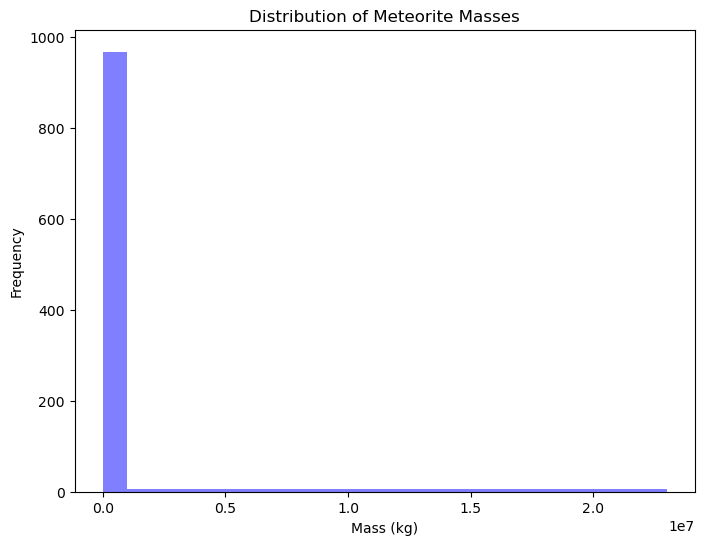

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


bin_edges = [0, 1000000, 23000000]

plt.hist(df4['mass'], bins=bin_edges, color='blue', alpha=0.5)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Masses')
plt.show()


most frequent Meteorite have small masses